In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [ ]:
# UCI DryBean
# independent variable (X) : 13~16 : Shape Factor (SF1, SF2, SF3, SF4)
# dependent variable (y) : class

# DNN Classifier 적용

In [33]:
data = pd.read_csv('Dry_Bean_Dataset.csv', encoding='cp949')

X = data.iloc[:, 12:16]

# print(X)

y = data.iloc[:, -1]

enc = LabelEncoder()
y = enc.fit(y).transform(y)

# print(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10)

print(X_train.shape)

(10208, 4)


Epoch 1/50
319/319 [==============================] - 1s 721us/step - loss: 1.2291 - accuracy: 0.5159
Epoch 2/50
319/319 [==============================] - 0s 753us/step - loss: 1.0724 - accuracy: 0.5834
Epoch 3/50
319/319 [==============================] - 0s 706us/step - loss: 1.0719 - accuracy: 0.5839
Epoch 4/50
319/319 [==============================] - 0s 705us/step - loss: 1.0452 - accuracy: 0.5970
Epoch 5/50
319/319 [==============================] - 0s 702us/step - loss: 1.0505 - accuracy: 0.5955
Epoch 6/50
319/319 [==============================] - 0s 715us/step - loss: 1.0490 - accuracy: 0.5923
Epoch 7/50
319/319 [==============================] - 0s 806us/step - loss: 1.0167 - accuracy: 0.6071
Epoch 8/50
319/319 [==============================] - 0s 734us/step - loss: 1.0306 - accuracy: 0.6061
Epoch 9/50
319/319 [==============================] - 0s 775us/step - loss: 1.0089 - accuracy: 0.6069
Epoch 10/50
319/319 [==============================] - 0s 746us/step - loss: 0.955

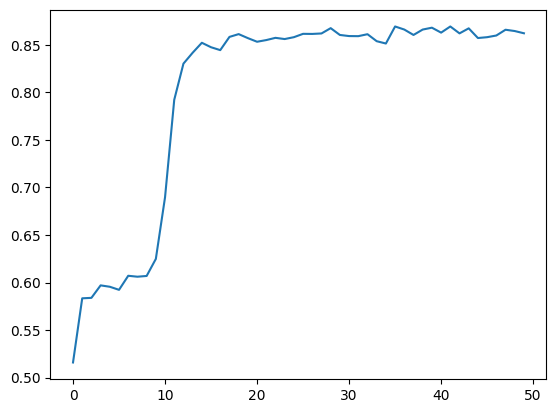

In [38]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=[4,]),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(7)  # target의 개수
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # 분류기는 accuracy를 확인

h = model.fit(X_train, y_train, epochs=50)

_, axe = plt.subplots()

axe.plot(h.history['accuracy'])